In [94]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [95]:
# Cargar el dataset Iris
iris = load_iris()

#Transormar a dataframe
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Añadir la columna de la clase al DataFrame
iris_df['species'] = iris.target

# Mapear los valores numéricos de la clase a nombres de especies
iris_df['named_species'] = iris_df['species'].map({i: species for i, species in enumerate(iris.target_names)})
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,named_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [96]:
X = iris_df.values[:, :2]  # Usar solo las dos primeras características
y = iris_df.species

In [97]:
# Filtrar solo dos clases para clasificación binaria
X, y = X[y != 2], y[y != 2]
X.shape, y.shape

((100, 2), (100,))

In [98]:
# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0, stratify = y)

In [100]:
from sklearn.neighbors import KNeighborsClassifier

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=35)

In [101]:
# Entrenar el clasificador
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [102]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1])

In [103]:
y_proba = knn.predict_proba(X_test)
y_proba

array([[0.05714286, 0.94285714],
       [0.85714286, 0.14285714],
       [0.88571429, 0.11428571],
       [0.17142857, 0.82857143],
       [0.42857143, 0.57142857],
       [0.88571429, 0.11428571],
       [0.17142857, 0.82857143],
       [0.88571429, 0.11428571],
       [0.17142857, 0.82857143],
       [0.17142857, 0.82857143],
       [0.88571429, 0.11428571],
       [0.77142857, 0.22857143],
       [0.88571429, 0.11428571],
       [0.82857143, 0.17142857],
       [0.        , 1.        ],
       [0.17142857, 0.82857143],
       [0.8       , 0.2       ],
       [0.71428571, 0.28571429],
       [0.74285714, 0.25714286],
       [0.94285714, 0.05714286],
       [0.22857143, 0.77142857],
       [0.2       , 0.8       ],
       [0.88571429, 0.11428571],
       [0.08571429, 0.91428571],
       [0.17142857, 0.82857143],
       [0.22857143, 0.77142857],
       [0.17142857, 0.82857143],
       [0.77142857, 0.22857143],
       [0.77142857, 0.22857143],
       [0.37142857, 0.62857143]])

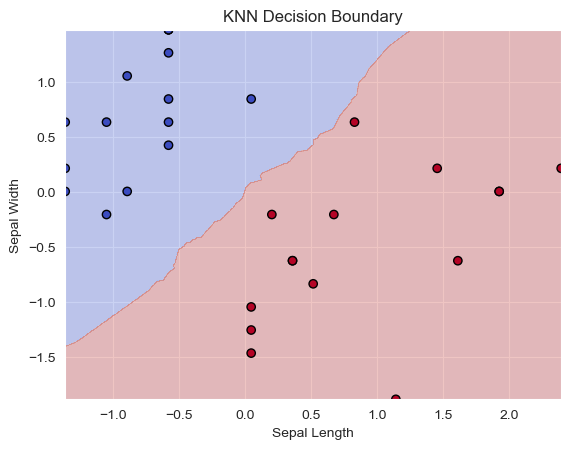

In [104]:
# Visualización de fronteras de decisión
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 1000),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 1000))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Decision Boundary')
plt.show()